#Challenge Dados 2ª Edição

#Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import json
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier

#**Extração, Transformação e Carregamento dos Dados**

##Importando os dados no formato .json


In [2]:
url = 'https://challenge-data-science-3ed.s3.amazonaws.com/Telco-Customer-Churn.json'
response = requests.get(url)
dados = response.json()
dados = pd.json_normalize(dados)
dados.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [3]:
dados.shape

(7267, 21)

In [4]:
dados.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

## Renomeando as colunas

In [6]:
dados.rename(columns= {'customer.gender':'Gender'}, inplace = True)
dados.rename(columns= {'customer.SeniorCitizen': 'SeniorCitizen'}, inplace = True)
dados.rename(columns= {'customer.Partner': 'Partner'}, inplace = True)
dados.rename(columns= {'customer.Dependents': 'Dependents'}, inplace = True)
dados.rename(columns= {'customer.tenure': 'Tenure'}, inplace = True)
dados.rename(columns= {'phone.PhoneService': 'PhoneService'}, inplace = True)
dados.rename(columns= {'phone.MultipleLines': 'MultipleLines'}, inplace = True)
dados.rename(columns= {'internet.InternetService': 'InternetService'}, inplace = True)
dados.rename(columns= {'internet.OnlineSecurity': 'OnlineSecurity'}, inplace = True)
dados.rename(columns= {'internet.OnlineBackup': 'OnlineBackup'}, inplace = True)
dados.rename(columns= {'internet.DeviceProtection': 'DeviceProtection'}, inplace = True)
dados.rename(columns= {'internet.TechSupport': 'TechSupport'}, inplace = True)
dados.rename(columns= {'internet.StreamingTV': 'StreamingTV'}, inplace = True)
dados.rename(columns= {'internet.StreamingMovies': 'StreamingMovies'}, inplace = True)
dados.rename(columns= {'account.Contract': 'Contract'}, inplace = True)
dados.rename(columns= {'account.PaperlessBilling': 'PaperlessBilling'}, inplace = True)
dados.rename(columns= {'account.PaymentMethod': 'PaymentMethod'}, inplace = True)
dados.rename(columns= {'account.Charges.Monthly': 'ChargesMonthly'}, inplace = True)
dados.rename(columns= {'account.Charges.Total': 'ChargesTotal'}, inplace = True)
dados.head()

,customerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


##Identificar os valores únicos de cada coluna e o seu tipo

In [7]:
dados.reset_index(drop=True, inplace=True)

In [8]:
clientes = dados

In [9]:
for coluna in clientes.columns:
  print(f'Os valores únicos da coluna {coluna}, são: {clientes[coluna].unique()}, do tipo {clientes[coluna].dtype}', end='\n\n')


Os valores únicos da coluna customerID, são: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH'], do tipo object

Os valores únicos da coluna Churn, são: ['No' 'Yes' ''], do tipo object

Os valores únicos da coluna Gender, são: ['Female' 'Male'], do tipo object

Os valores únicos da coluna SeniorCitizen, são: [0 1], do tipo int64

Os valores únicos da coluna Partner, são: ['Yes' 'No'], do tipo object

Os valores únicos da coluna Dependents, são: ['Yes' 'No'], do tipo object

Os valores únicos da coluna Tenure, são: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0], do tipo int64

Os valores únicos da coluna PhoneService, são: ['Yes' 'No'], do tipo object

Os valores únicos da coluna MultipleLines, são: ['No' 'Yes' 'No phone service'], do tipo object

Os valores únicos da coluna Inte

##Limpando os dados

Com base na análise dos valores únicos, foi possível verificar que a coluna Churn apresenta dados vazios, o que pode prejudicar a representatividade dos dados, sendo assim iremos remover os dados dos clientes com esta característica.

Inicialmente iremos quantificar a frequência desta inconsistencia no nosso dado.

In [10]:
clientes.query('Churn not in ["Yes", "No"]').shape

(224, 21)

Existem 224 cadastros de clientes em que não foi preenchido a informação de Churn, sendo assim, a melhor postura a adotar neste momento é a remoção destes dados.

In [11]:
clientes_a_serem_removidos = clientes.query('Churn not in ["Yes", "No"]').index
clientes.drop(clientes_a_serem_removidos, axis = 0, inplace=True)

A coluna total gasto (ChargesTotal) também possui uma inconsistência, uma vez que o retorno da função unique, apontou os valores dessa coluna como obj, portanto deve haver algum valor não numérico nesta.

In [12]:
clientes.query('ChargesTotal == " "').shape

(11, 21)

In [13]:
clientes['ChargesTotal'].isnull().unique()

array([False])

Após identificar os valores faltantes e que não há valores nulos, podemos preenche-los com valores corretos, que nada mais é do que o valor das mensalidades (ChargesMonthly) multiplicado pelo tempo de contrato (Tenure).

In [14]:
linhas_a_corrigir = clientes.query('ChargesTotal == " "').index

def corrige_valores(linhas_a_corrigir):
  for index in linhas_a_corrigir:
    a = clientes['ChargesTotal'][index]
    b = (clientes['ChargesMonthly'][index]) * (clientes['Tenure'][index])
    clientes.replace(a, b, inplace = True)

corrige_valores(linhas_a_corrigir)
clientes['ChargesTotal'] = clientes['ChargesTotal'].astype(float)

In [15]:
clientes.query('ChargesTotal == " "')

,customerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal


##Análises relevantes

Agora podemos analisar a relação entre a quantidade de clientes ativos e clientes que já foram desligados da empresa.

In [16]:
clientes.Churn.value_counts(normalize = True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

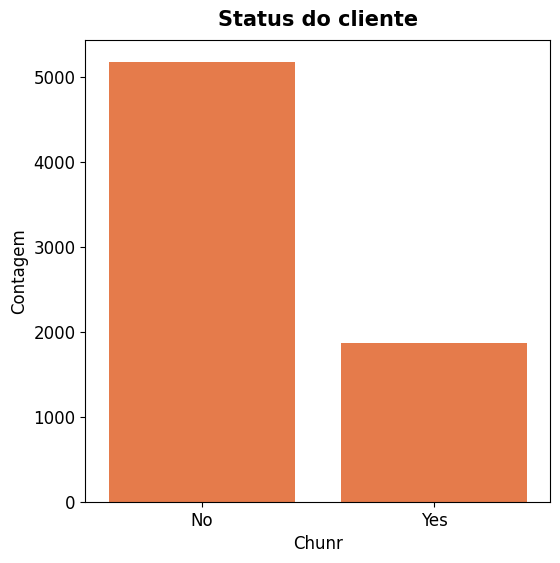

In [17]:
fig = plt.figure(figsize=(6,6))

ax= sns.countplot(x= 'Churn', data = clientes, color='#ff7131')
ax.set_title('Status do cliente', fontsize=15, fontweight='bold', pad=10)
ax.set_xlabel('Chunr', fontsize=12)
ax.set_ylabel('Contagem', fontsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)


In [18]:
valor_mensalidade = clientes.groupby('Contract')[['ChargesMonthly', 'ChargesTotal']].mean()
valor_mensalidade

,ChargesMonthly,ChargesTotal
Contract,,
Month-to-month,66.398490,1369.254581
One year,65.048608,3032.622878
Two year,60.770413,3706.934336


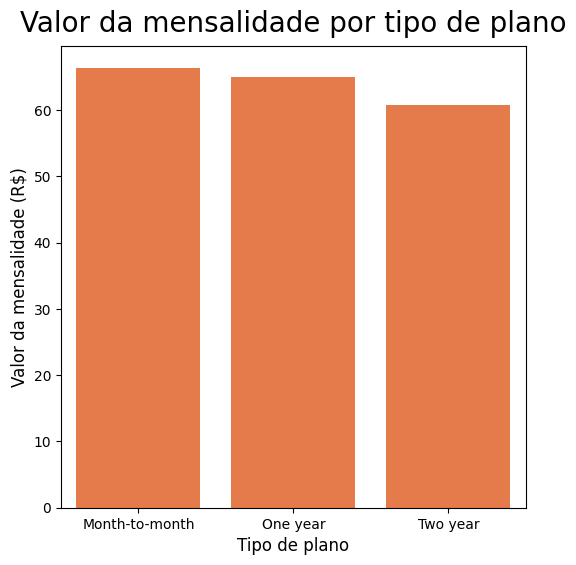

In [19]:
fig = plt.figure(figsize=(6,6))

axs=sns.barplot(x=valor_mensalidade.index, y=valor_mensalidade['ChargesMonthly'], color='#ff7131')
axs.set_title('Valor da mensalidade por tipo de plano', fontsize=20, pad=10)
axs.set_xlabel('Tipo de plano', fontsize=12)
axs.set_ylabel('Valor da mensalidade (R$)', fontsize=12)

plt.show()

In [20]:
cor = ['#ff7131', '#872b95']

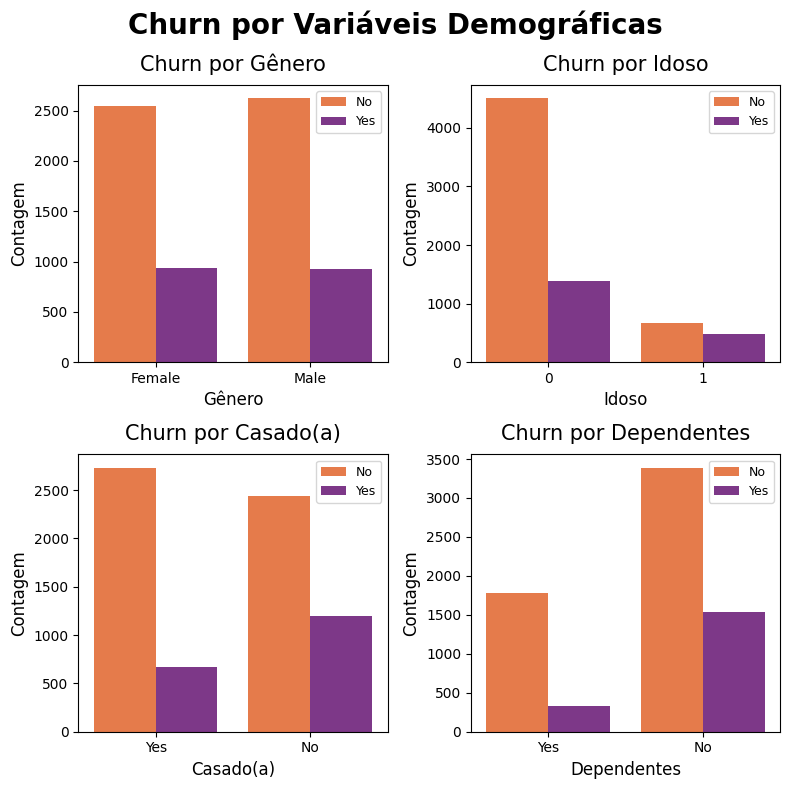

In [21]:
fig = plt.figure(figsize=(8,8))
plt.suptitle('Churn por Variáveis Demográficas', fontsize=20, fontweight='bold')

plt.subplot(2,2, 1)
axs = sns.countplot(x="Gender", data = clientes, hue= 'Churn', palette=cor)
axs.set_title('Churn por Gênero', fontsize=15, pad=10)
axs.legend(loc = 'upper right', fontsize=9)
axs.set_xlabel('Gênero', fontsize=12)
axs.set_ylabel('Contagem', fontsize=12)

plt.subplot(2,2, 2)
axs = sns.countplot(x="SeniorCitizen", data = clientes, hue= 'Churn', palette=cor)
axs.set_title('Churn por Idoso', fontsize=15, pad=10)
axs.legend(loc = 'upper right', fontsize=9)
axs.set_xlabel('Idoso', fontsize=12)
axs.set_ylabel('Contagem', fontsize=12)

plt.subplot(2,2, 3)
axs = sns.countplot(x="Partner", data = clientes, hue= 'Churn', palette=cor)
axs.set_title('Churn por Casado(a)', fontsize=15, pad=10)
axs.legend(loc = 'upper right', fontsize=9)
axs.set_xlabel('Casado(a)', fontsize=12)
axs.set_ylabel('Contagem', fontsize=12)

plt.subplot(2,2, 4)
axs = sns.countplot(x="Dependents", data = clientes, hue= 'Churn', palette=cor)
axs.set_title('Churn por Dependentes', fontsize=15, pad=10)
axs.legend(loc = 'upper right', fontsize=9)
axs.set_xlabel('Dependentes', fontsize=12)
axs.set_ylabel('Contagem', fontsize=12)

plt.tight_layout()
plt.show()

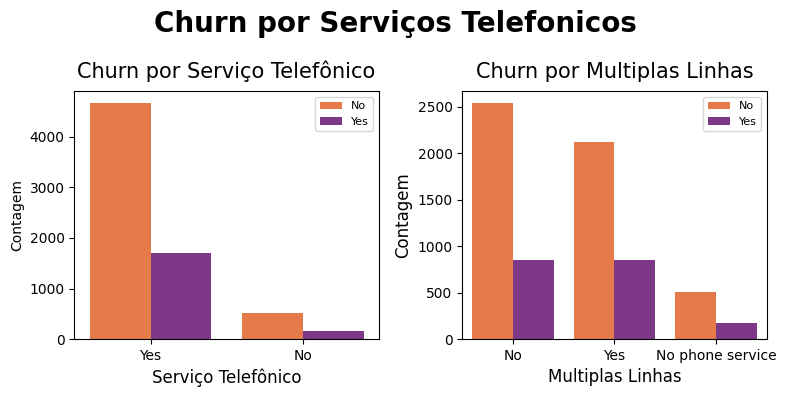

In [22]:
plt.figure(figsize=(8,4))
plt.suptitle('Churn por Serviços Telefonicos', fontsize=20, fontweight='bold')

plt.subplot(1,2, 1)
axs=sns.countplot(x='PhoneService', data=clientes, hue='Churn', palette=cor)
axs.set_title('Churn por Serviço Telefônico', fontsize=15, pad=10)
axs.legend(loc = 'upper right', fontsize=8)
axs.set_xlabel('Serviço Telefônico', fontsize=12)
axs.set_ylabel('Contagem', fontsize=10)

plt.subplot(1,2, 2)
axs=sns.countplot(x='MultipleLines', data=clientes, hue='Churn', palette=cor)
axs.set_title('Churn por Multiplas Linhas', fontsize=15, pad=10)
axs.legend(loc = 'upper right', fontsize=8)
axs.set_xlabel('Multiplas Linhas', fontsize=12)
axs.set_ylabel('Contagem', fontsize=12)

plt.tight_layout()
plt.show()

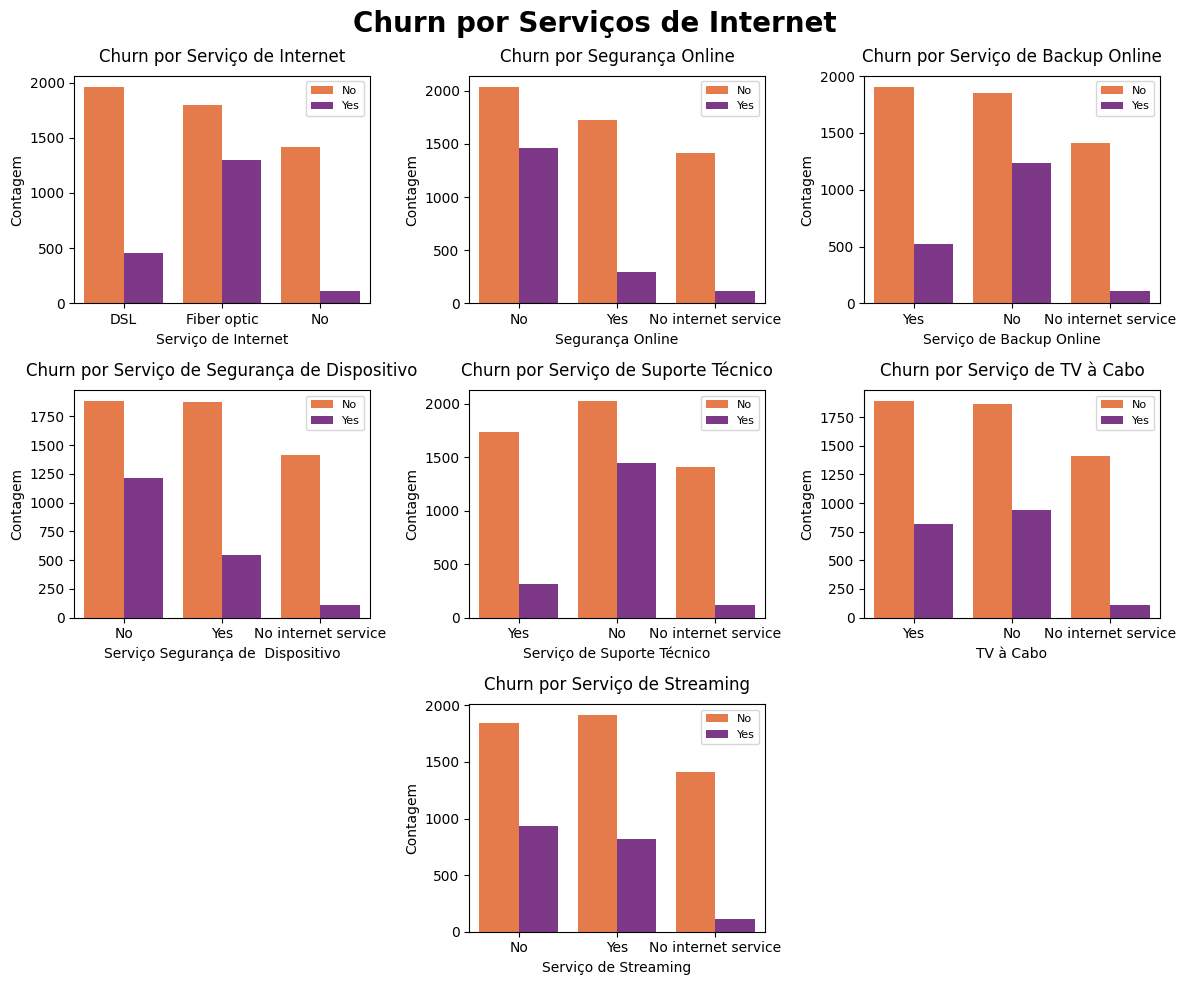

In [23]:
plt.figure(figsize=(12,10))
plt.suptitle('Churn por Serviços de Internet', fontsize=20, fontweight='bold')

plt.subplot(3,3, 1)
axs=sns.countplot(x='InternetService', data=clientes, hue='Churn', palette=cor)
axs.set_title('Churn por Serviço de Internet', fontsize=12, pad=10)
axs.legend(loc = 'upper right', fontsize=8)
axs.set_xlabel('Serviço de Internet', fontsize=10)
axs.set_ylabel('Contagem', fontsize=10)

plt.subplot(3,3, 2)
axs=sns.countplot(x='OnlineSecurity', data=clientes, hue='Churn', palette=cor)
axs.set_title('Churn por Segurança Online', fontsize=12, pad=10)
axs.legend(loc = 'upper right', fontsize=8)
axs.set_xlabel('Segurança Online', fontsize=10)
axs.set_ylabel('Contagem', fontsize=10)

plt.subplot(3,3, 3)
axs=sns.countplot(x='OnlineBackup', data=clientes, hue='Churn', palette=cor)
axs.set_title('Churn por Serviço de Backup Online', fontsize=12, pad=10)
axs.legend(loc = 'upper right', fontsize=8)
axs.set_xlabel('Serviço de Backup Online', fontsize=10)
axs.set_ylabel('Contagem', fontsize=10)

plt.subplot(3,3, 4)
axs=sns.countplot(x='DeviceProtection', data=clientes, hue='Churn', palette=cor)
axs.set_title('Churn por Serviço de Segurança de Dispositivo', fontsize=12, pad=10)
axs.legend(loc = 'upper right', fontsize=8)
axs.set_xlabel('Serviço Segurança de  Dispositivo', fontsize=10)
axs.set_ylabel('Contagem', fontsize=10)

plt.subplot(3,3, 5)
axs=sns.countplot(x='TechSupport', data=clientes, hue='Churn', palette=cor)
axs.set_title('Churn por Serviço de Suporte Técnico', fontsize=12, pad=10)
axs.legend(loc = 'upper right', fontsize=8)
axs.set_xlabel('Serviço de Suporte Técnico', fontsize=10)
axs.set_ylabel('Contagem', fontsize=10)

plt.subplot(3,3, 6)
axs=sns.countplot(x='StreamingTV', data=clientes, hue='Churn', palette=cor)
axs.set_title('Churn por Serviço de TV à Cabo', fontsize=12, pad=10)
axs.legend(loc = 'upper right', fontsize=8)
axs.set_xlabel('TV à Cabo', fontsize=10)
axs.set_ylabel('Contagem', fontsize=10)

plt.subplot(3,3, 8)
axs=sns.countplot(x='StreamingMovies', data=clientes, hue='Churn', palette=cor)
axs.set_title('Churn por Serviço de Streaming', fontsize=12, pad=10)
axs.legend(loc = 'upper right', fontsize=8)
axs.set_xlabel('Serviço de Streaming', fontsize=10)
axs.set_ylabel('Contagem', fontsize=10)

plt.tight_layout()
plt.show()

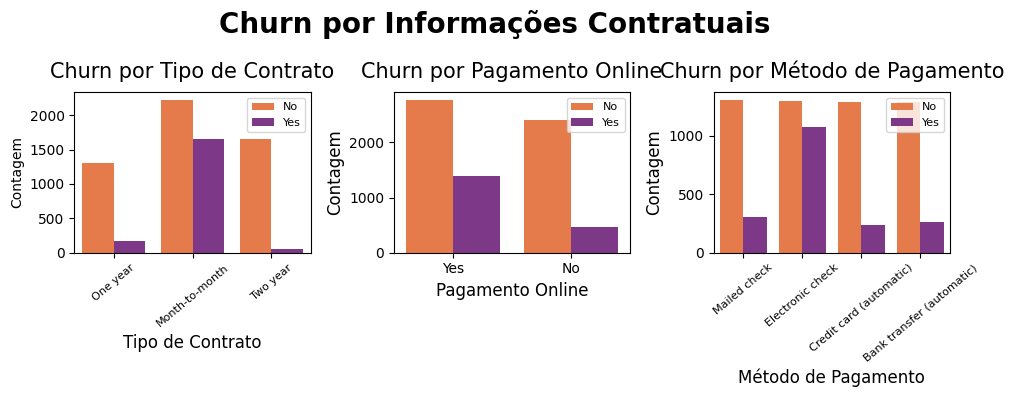

In [24]:
plt.figure(figsize=(10,4))
plt.suptitle('Churn por Informações Contratuais', fontsize=20, fontweight='bold')

plt.subplot(1,3, 1)
axs=sns.countplot(x='Contract', data=clientes, hue='Churn', palette=cor)
axs.set_title('Churn por Tipo de Contrato', fontsize=15, pad=10)
axs.legend(loc = 'upper right', fontsize=8)
axs.set_xlabel('Tipo de Contrato', fontsize=12)
axs.set_ylabel('Contagem', fontsize=10)
axs.xaxis.set_tick_params(labelsize=8, rotation=40)

plt.subplot(1,3, 2)
axs=sns.countplot(x='PaperlessBilling', data=clientes, hue='Churn', palette=cor)
axs.set_title('Churn por Pagamento Online', fontsize=15, pad=10)
axs.legend(loc = 'upper right', fontsize=8)
axs.set_xlabel('Pagamento Online', fontsize=12)
axs.set_ylabel('Contagem', fontsize=12)

plt.subplot(1,3, 3)
axs=sns.countplot(x='PaymentMethod', data=clientes, hue='Churn', palette=cor)
axs.set_title('Churn por Método de Pagamento', fontsize=15, pad=10)
axs.legend(loc = 'upper right', fontsize=8)
axs.set_xlabel('Método de Pagamento', fontsize=12)
axs.set_ylabel('Contagem', fontsize=12)
axs.xaxis.set_tick_params(labelsize=8, rotation=40)


plt.tight_layout()
plt.show()

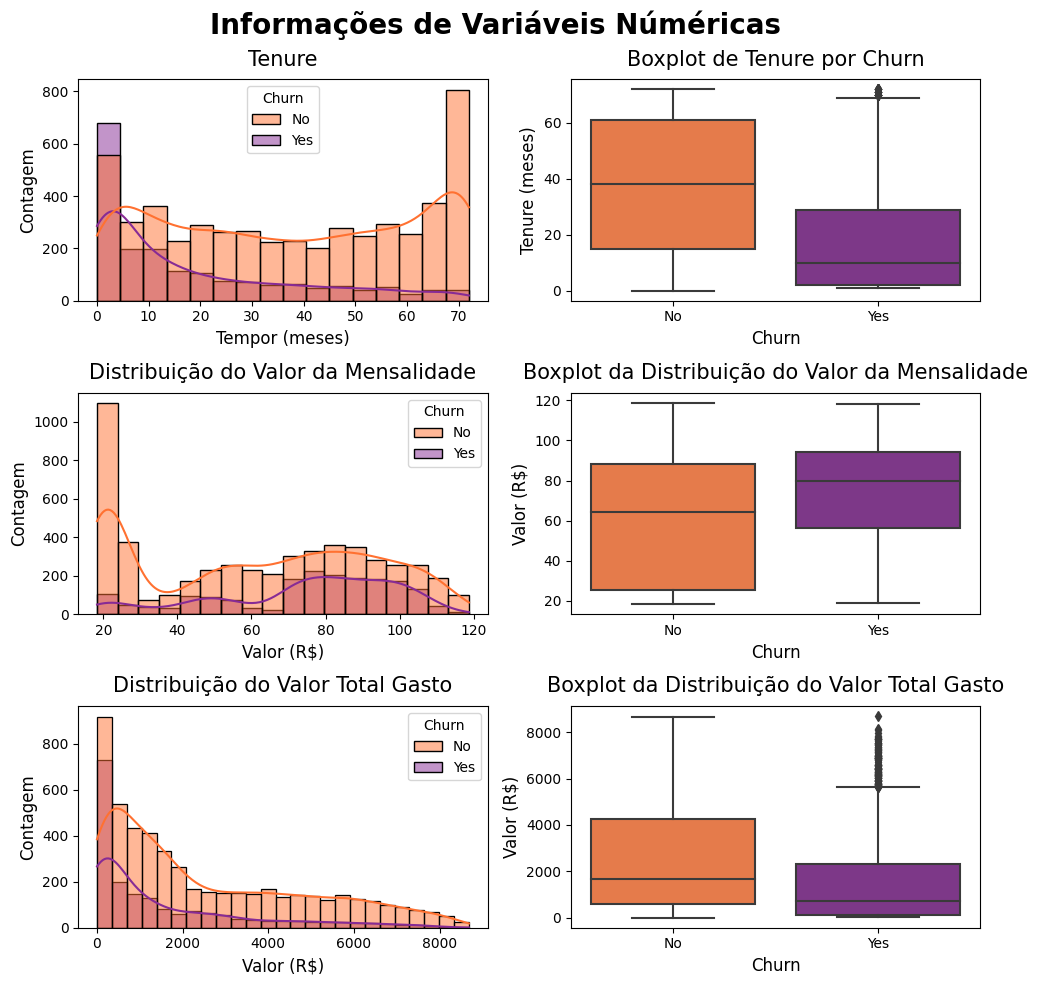

In [25]:
plt.figure(figsize=(10,10))
plt.suptitle('Informações de Variáveis Núméricas', fontsize=20, fontweight='bold')

plt.subplot(3,2, 1)
axs=sns.histplot(x='Tenure', data=clientes, kde=True, hue='Churn', palette=cor)
axs.set_title('Tenure', fontsize=15, pad=10)
axs.set_xlabel('Tempor (meses)', fontsize=12)
axs.set_ylabel('Contagem', fontsize=12)

plt.subplot(3,2, 2)
axs=sns.boxplot(y='Tenure', x='Churn', data=clientes, palette=cor)
axs.set_title('Boxplot de Tenure por Churn',fontsize=15, pad=10)
axs.set_xlabel('Churn', fontsize=12)
axs.set_ylabel('Tenure (meses)', fontsize=12)

plt.subplot(3,2, 3)
axs=sns.histplot(x='ChargesMonthly', data=clientes, kde=True, hue='Churn', palette=cor)
axs.set_title('Distribuição do Valor da Mensalidade', fontsize=15, pad=10)
axs.set_xlabel('Valor (R$)', fontsize=12)
axs.set_ylabel('Contagem', fontsize=12)

plt.subplot(3,2, 4)
axs=sns.boxplot(y='ChargesMonthly', x='Churn', data=clientes, palette=cor)
axs.set_title('Boxplot da Distribuição do Valor da Mensalidade',fontsize=15, pad=10)
axs.set_xlabel('Churn', fontsize=12)
axs.set_ylabel('Valor (R$)', fontsize=12)

plt.subplot(3,2, 5)
axs=sns.histplot(x='ChargesTotal', data=clientes, kde=True, hue='Churn', palette=cor)
axs.set_title('Distribuição do Valor Total Gasto', fontsize=15, pad=10)
axs.set_xlabel('Valor (R$)', fontsize=12)
axs.set_ylabel('Contagem', fontsize=12)

plt.subplot(3,2, 6)
axs=sns.boxplot(y='ChargesTotal', x='Churn', data=clientes, palette=cor)
axs.set_title('Boxplot da Distribuição do Valor Total Gasto',fontsize=15, pad=10)
axs.set_xlabel('Churn', fontsize=12)
axs.set_ylabel('Valor (R$)', fontsize=12)

plt.tight_layout()
plt.show()

In [26]:
clientes_corr=clientes.corr()

<ipython-input-26-bf7fe57289dc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  clientes_corr=clientes.corr()


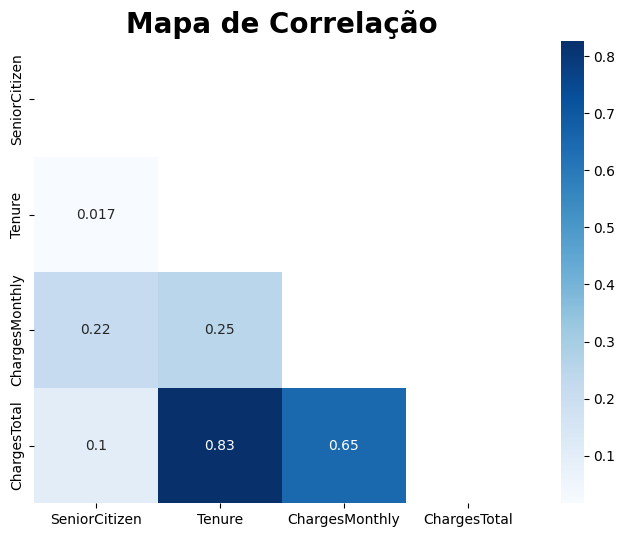

In [27]:
plt.figure(figsize=(8,6))

mask = np.triu(np.ones_like(clientes_corr, dtype=bool))

axs=sns.heatmap(clientes_corr, annot=True, mask=mask, cmap="Blues")
axs.set_title('Mapa de Correlação', fontsize=20, fontweight='bold')

plt.show()

#**Implementação de modelos de Machine Learning**

##Transformando variáveis categóricas binárias

As variáveis categóricas binárias são: Churn; Gender; SeniorCitzen; Partner; Dependents; PhoneService e PaperlessBilling;

In [28]:
variaveis_binarias = ['Churn', 'Gender', 'SeniorCitizen','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
clientes_binario = clientes

for variavel in variaveis_binarias:
  clientes_binario[variavel] = clientes[variavel].replace({'Yes':1, 'No':0,'Female':1, 'Male':0})

clientes_binario[variaveis_binarias].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Churn             7043 non-null   int64
 1   Gender            7043 non-null   int64
 2   SeniorCitizen     7043 non-null   int64
 3   Partner           7043 non-null   int64
 4   Dependents        7043 non-null   int64
 5   PhoneService      7043 non-null   int64
 6   PaperlessBilling  7043 non-null   int64
dtypes: int64(7)
memory usage: 698.2 KB


In [29]:
clientes_encoded = pd.get_dummies(clientes_binario, columns=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                                            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'])
clientes_encoded_ok = clientes_encoded.drop('customerID', axis=1)
clientes_encoded_ok = clientes_encoded_ok.drop('ChargesTotal', axis=1)
clientes_encoded_ok.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7266
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Churn                                    7043 non-null   int64  
 1   Gender                                   7043 non-null   int64  
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int64  
 4   Dependents                               7043 non-null   int64  
 5   Tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int64  
 7   PaperlessBilling                         7043 non-null   int64  
 8   ChargesMonthly                           7043 non-null   float64
 9   MultipleLines_No                         7043 non-null   uint8  
 10  MultipleLines_No phone service           7043 no

##Iniciando o treinamento de machine learning

In [30]:
X = clientes_encoded_ok.drop('Churn', axis=1)  # Características
y = clientes_encoded_ok['Churn']               # Coluna de destino

In [31]:
SEED = 5
np.random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Treinaremos com {len(X_train)} elementos e testaremos com {len(X_test)} elementos")

Treinaremos com 5634 elementos e testaremos com 1409 elementos


##Avaliação das métricas do modelo de arvore de decisão

In [32]:
cv = StratifiedKFold(n_splits = 10, shuffle = True)
modelo = DecisionTreeClassifier(max_depth=3)

acuracia = cross_validate(modelo, X, y, cv = cv, return_train_score=False)
precisao = cross_validate(modelo, X, y, cv = cv, scoring='precision', return_train_score=False)
recall = cross_validate(modelo, X, y, cv = cv, scoring='recall', return_train_score=False)
f1 = cross_validate(modelo, X, y, cv = cv, scoring='f1', return_train_score=False)

acuracia_media = acuracia['test_score'].mean()
acuracia_desvio_padrao = acuracia['test_score'].std()

precisao_media = precisao['test_score'].mean()
precisao_desvio_padrao = precisao['test_score'].std()

recall_media = recall['test_score'].mean()
recall_desvio_padrao = recall['test_score'].std()

f1_media = f1['test_score'].mean()
f1_desvio_padrao = f1['test_score'].std()

print(f'O intervalo de acurácia deste modelo foi entre {round((acuracia_media - 2*acuracia_desvio_padrao) * 100, 2)}% e {round((acuracia_media + 2*acuracia_desvio_padrao) * 100, 2)}')
print(f'O intervalo de precisão deste modelo foi entre {round((precisao_media - 2*precisao_desvio_padrao) * 100, 2)}% e {round((precisao_media + 2*precisao_desvio_padrao) * 100, 2)}')
print(f'O intervalo de recall deste modelo foi entre {round((recall_media - 2*recall_desvio_padrao) * 100, 2)}% e {round((recall_media + 2*recall_desvio_padrao) * 100, 2)}')
print(f'O intervalo de f1 deste modelo foi entre {round((f1_media - 2*f1_desvio_padrao) * 100, 2)}% e {round((f1_media + 2*f1_desvio_padrao) * 100, 2)}')


O intervalo de acurácia deste modelo foi entre 76.69% e 81.17
O intervalo de precisão deste modelo foi entre 62.9% e 74.92
O intervalo de recall deste modelo foi entre 31.27% e 44.39
O intervalo de f1 deste modelo foi entre 43.28% e 53.7


##Implementação do modelo de machine learning de arvore de decisão

In [33]:
modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(X_train, y_train)
previsao = modelo.predict(X_test)

acuracia = accuracy_score(y_test, previsao) * 100
precisao = precision_score(y_test, previsao) * 100
recall = recall_score(y_test, previsao) * 100
f1 = f1_score(y_test, previsao) * 100

print(f'A acurácia foi de {round(acuracia, 2)}%')
print(f'A precisão foi de {round(precisao, 2)}%')
print(f'O recall foi de {round(recall, 2)}%')
print(f'O f1 foi de {round(f1, 2)}%')

A acurácia foi de 79.42%
A precisão foi de 70.19%
O recall foi de 39.04%
O f1 foi de 50.17%


In [34]:
metricas_df = pd.DataFrame({'Modelo':'Árvore de Decisão', 'Acurácia':acuracia, 'Precisão':precisao, 'Recall':recall, 'f1':f1}, index=[0])
metricas_df

,Modelo,Acurácia,Precisão,Recall,f1
0,Árvore de Decisão,79.418027,70.192308,39.037433,50.171821


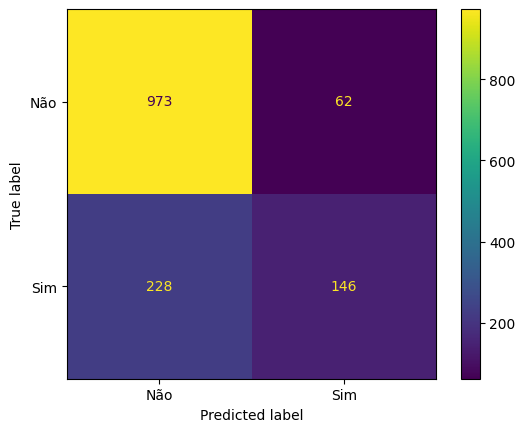

In [35]:
mc=confusion_matrix(y_test, previsao)
cm_display = ConfusionMatrixDisplay(mc, display_labels=['Não','Sim']).plot()

##Avaliação das métricas do modelo de machine learning de gradiente boosting

In [36]:
cv = StratifiedKFold(n_splits = 10, shuffle = True)
modelo = GradientBoostingClassifier()

acuracia = cross_validate(modelo, X, y, cv = cv, return_train_score=False)
precisao = cross_validate(modelo, X, y, cv = cv, scoring='precision', return_train_score=False)
recall = cross_validate(modelo, X, y, cv = cv, scoring='recall', return_train_score=False)
f1 = cross_validate(modelo, X, y, cv = cv, scoring='f1', return_train_score=False)

acuracia_media = acuracia['test_score'].mean()
acuracia_desvio_padrao = acuracia['test_score'].std()

precisao_media = precisao['test_score'].mean()
precisao_desvio_padrao = precisao['test_score'].std()

recall_media = recall['test_score'].mean()
recall_desvio_padrao = recall['test_score'].std()

f1_media = f1['test_score'].mean()
f1_desvio_padrao = f1['test_score'].std()

print(f'O intervalo de acurácia deste modelo foi entre {round((acuracia_media - 2*acuracia_desvio_padrao) * 100, 2)}% e {round((acuracia_media + 2*acuracia_desvio_padrao) * 100, 2)}')
print(f'O intervalo de precisão deste modelo foi entre {round((precisao_media - 2*precisao_desvio_padrao) * 100, 2)}% e {round((precisao_media + 2*precisao_desvio_padrao) * 100, 2)}')
print(f'O intervalo de recall deste modelo foi entre {round((recall_media - 2*recall_desvio_padrao) * 100, 2)}% e {round((recall_media + 2*recall_desvio_padrao) * 100, 2)}')
print(f'O intervalo de f1 deste modelo foi entre {round((f1_media - 2*f1_desvio_padrao) * 100, 2)}% e {round((f1_media + 2*f1_desvio_padrao) * 100, 2)}')


O intervalo de acurácia deste modelo foi entre 77.84% e 82.69
O intervalo de precisão deste modelo foi entre 61.41% e 71.88
O intervalo de recall deste modelo foi entre 44.42% e 60.23
O intervalo de f1 deste modelo foi entre 53.45% e 64.95


##Implementação do modelo de machine learning de gradiente boosting

In [37]:
modelo = GradientBoostingClassifier()
modelo.fit(X_train, y_train)
previsao = modelo.predict(X_test)

acuracia = accuracy_score(y_test, previsao) * 100
precisao = precision_score(y_test, previsao) * 100
recall = recall_score(y_test, previsao) * 100
f1 = f1_score(y_test, previsao) * 100

print(f'A acurácia foi de {round(acuracia, 2)}%')
print(f'A precisão foi de {round(precisao, 2)}%')
print(f'O recall foi de {round(recall, 2)}%')
print(f'O f1 foi de {round(f1, 2)}%')

A acurácia foi de 79.35%
A precisão foi de 64.07%
O recall foi de 50.53%
O f1 foi de 56.5%


In [38]:
metricas_df.loc[1]={'Modelo':'Gradiente Boosting', 'Acurácia':acuracia, 'Precisão':precisao, 'Recall':recall, 'f1':f1}
metricas_df

,Modelo,Acurácia,Precisão,Recall,f1
0,Árvore de Decisão,79.418027,70.192308,39.037433,50.171821
1,Gradiente Boosting,79.347055,64.067797,50.534759,56.502242


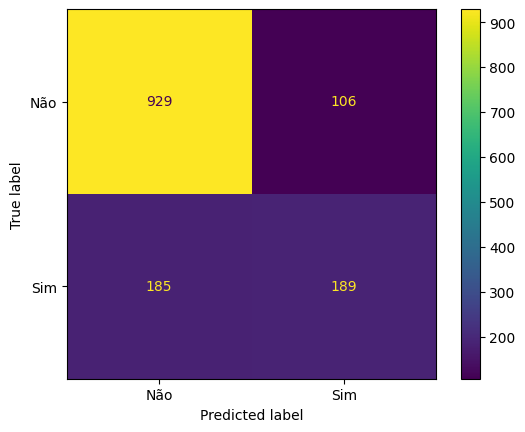

In [39]:
mc=confusion_matrix(y_test, previsao)
cm_display = ConfusionMatrixDisplay(mc, display_labels=['Não','Sim']).plot()